In [7]:
import pandas as pd
import glob

# Find all your result CSV files in the current directory
all_files = glob.glob('results_*.csv')

# --- DIAGNOSTIC STEP ---
# This will show you if any files were found.
# If it prints an empty list [], your notebook is in the wrong place.
print("Found the following files to analyze:")
print(all_files)
# --------------------

# Create a list to hold each DataFrame
li = []

# Loop through the files, read them, and add platform/test info
for filename in all_files:
    df = pd.read_csv(filename)
    # Extract info from the filename
    parts = filename.replace('.csv', '').split('_')
    df['platform'] = parts[1].upper()
    df['test_type'] = parts[2].upper()
    df['payload_size'] = parts[3]
    li.append(df)

# Check if the list of dataframes is empty before concatenating
if not li:
    print("\nERROR: No dataframes were created because no CSV files were found.")
    print("Please ensure your 'analysis.ipynb' notebook is in the same folder as your 'results_*.csv' files.")
else:
    # Combine all DataFrames into one
    master_df = pd.concat(li, axis=0, ignore_index=True)
    
    # Crucial step: Convert payload_size to a numeric type for correct plotting
    master_df['payload_size'] = pd.to_numeric(master_df['payload_size'])

    print("\nSuccessfully loaded and combined all data!")
    # Use display() in Jupyter to get a nicely formatted table
    display(master_df.head())

Found the following files to analyze:
['results_aws_cpubound_1000.csv', 'results_aws_cpubound_300.csv', 'results_aws_iobound_1024.csv', 'results_aws_iobound_256.csv', 'results_azure_cpubound_1000.csv', 'results_azure_cpubound_300.csv', 'results_azure_iobound_1024.csv', 'results_azure_iobound_256.csv']

Successfully loaded and combined all data!


,request_id,status_code,end_to_end_latency_ms,server_duration_ms,network_latency_ms,platform,test_type,payload_size
0,1,200,716.14,497.91,218.23,AWS,CPUBOUND,1000
1,2,200,750.57,499.13,251.44,AWS,CPUBOUND,1000
2,3,200,704.62,456.28,248.34,AWS,CPUBOUND,1000
3,4,200,712.59,498.50,214.09,AWS,CPUBOUND,1000
4,5,200,739.50,499.43,240.07,AWS,CPUBOUND,1000


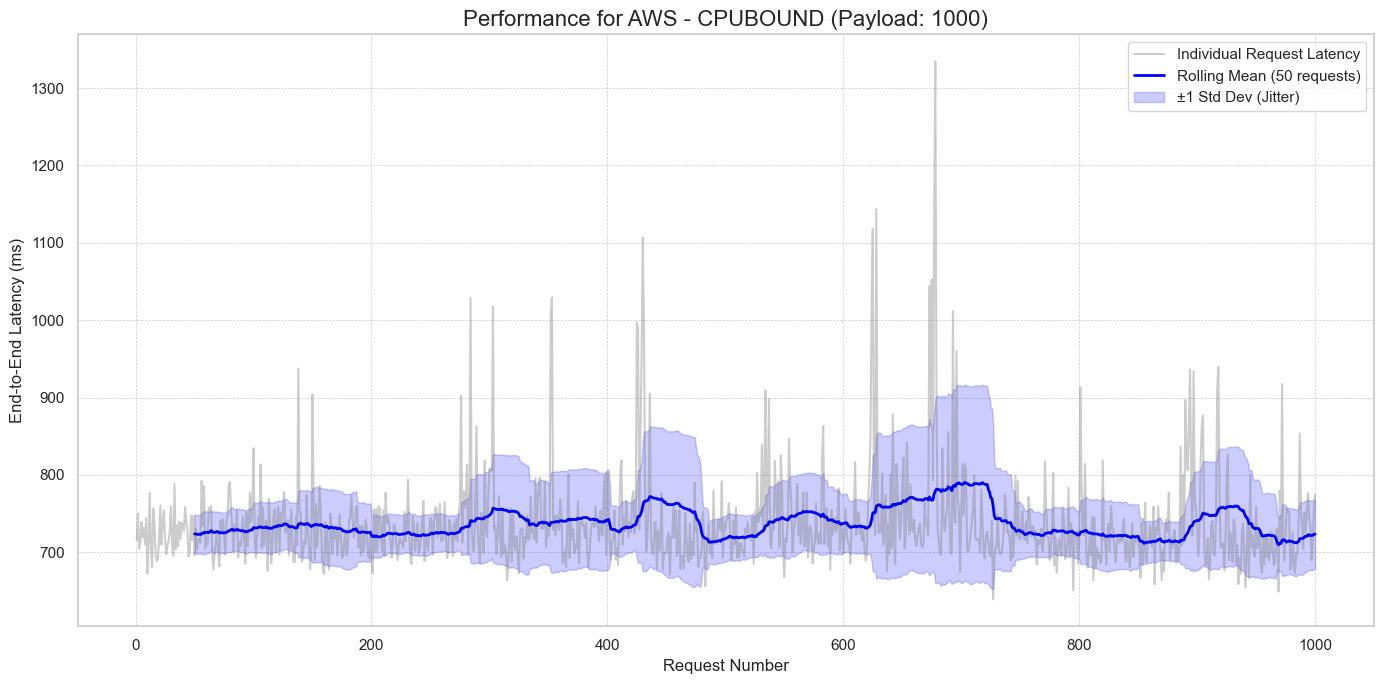

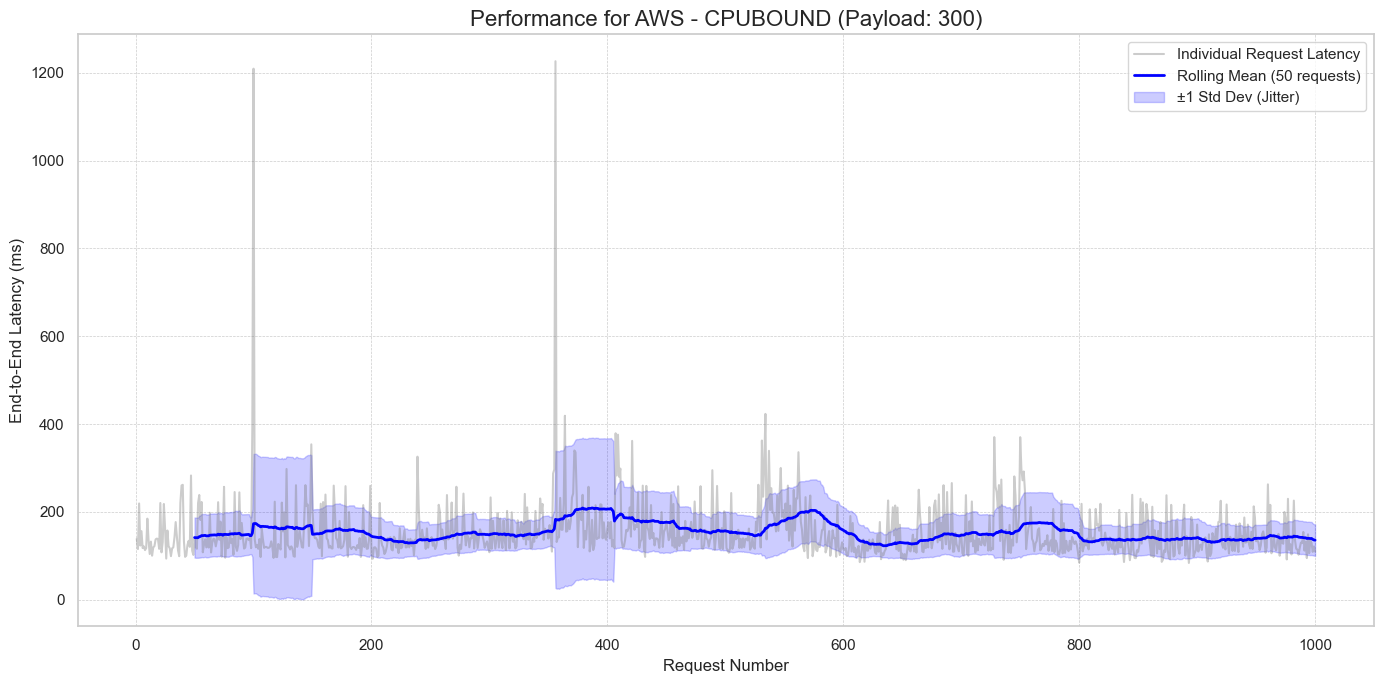

No data for AWS - CPUBOUND - 1024
No data for AWS - CPUBOUND - 256
No data for AWS - IOBOUND - 1000
No data for AWS - IOBOUND - 300


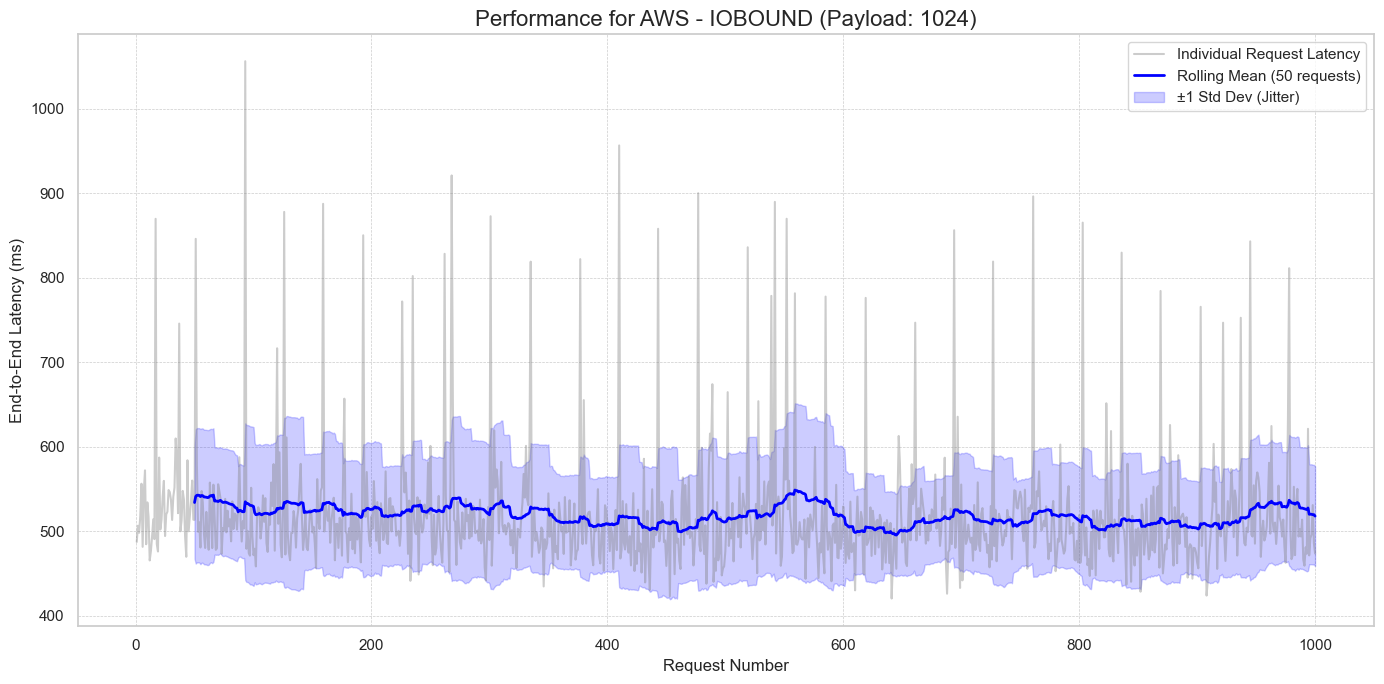

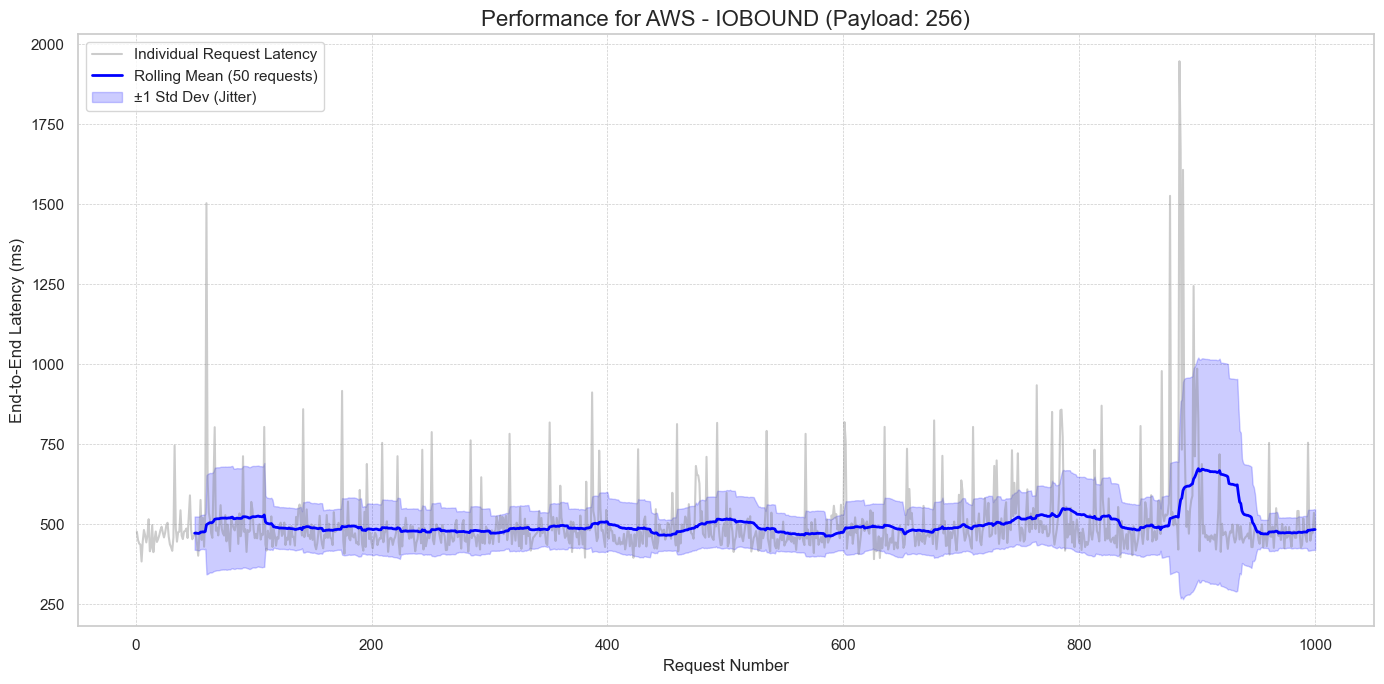

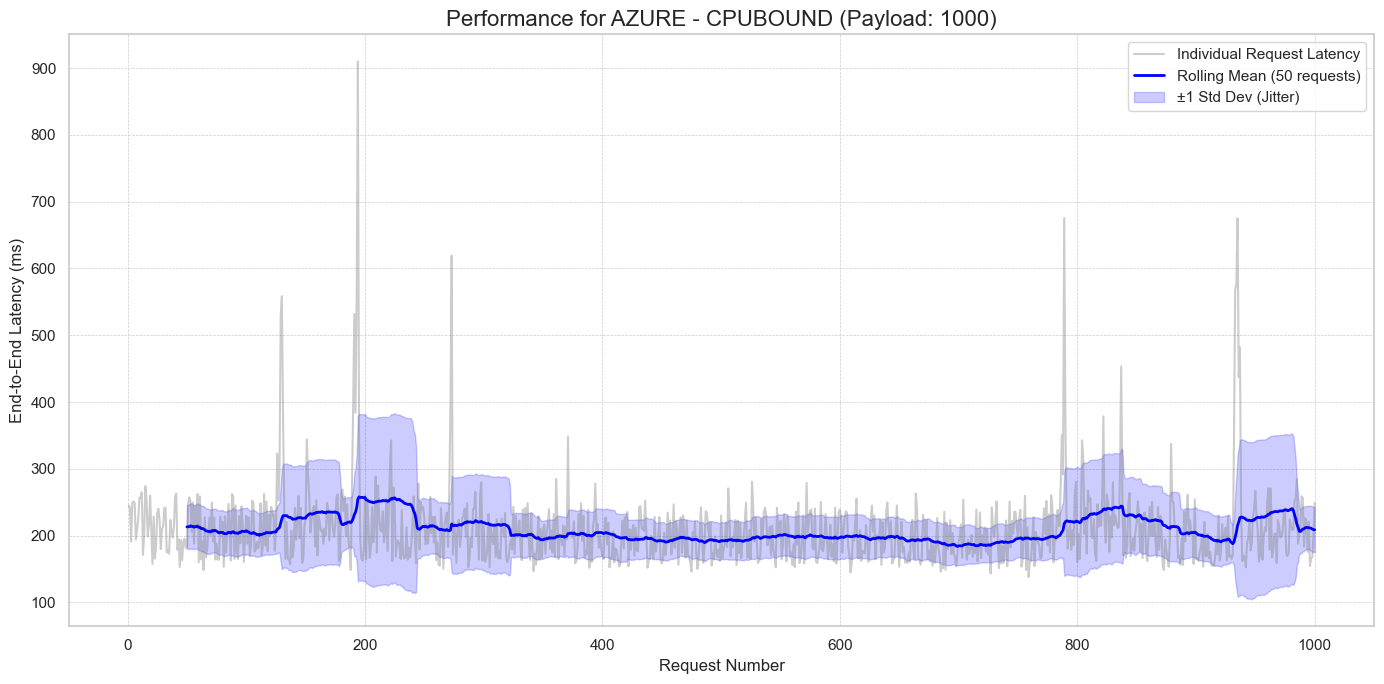

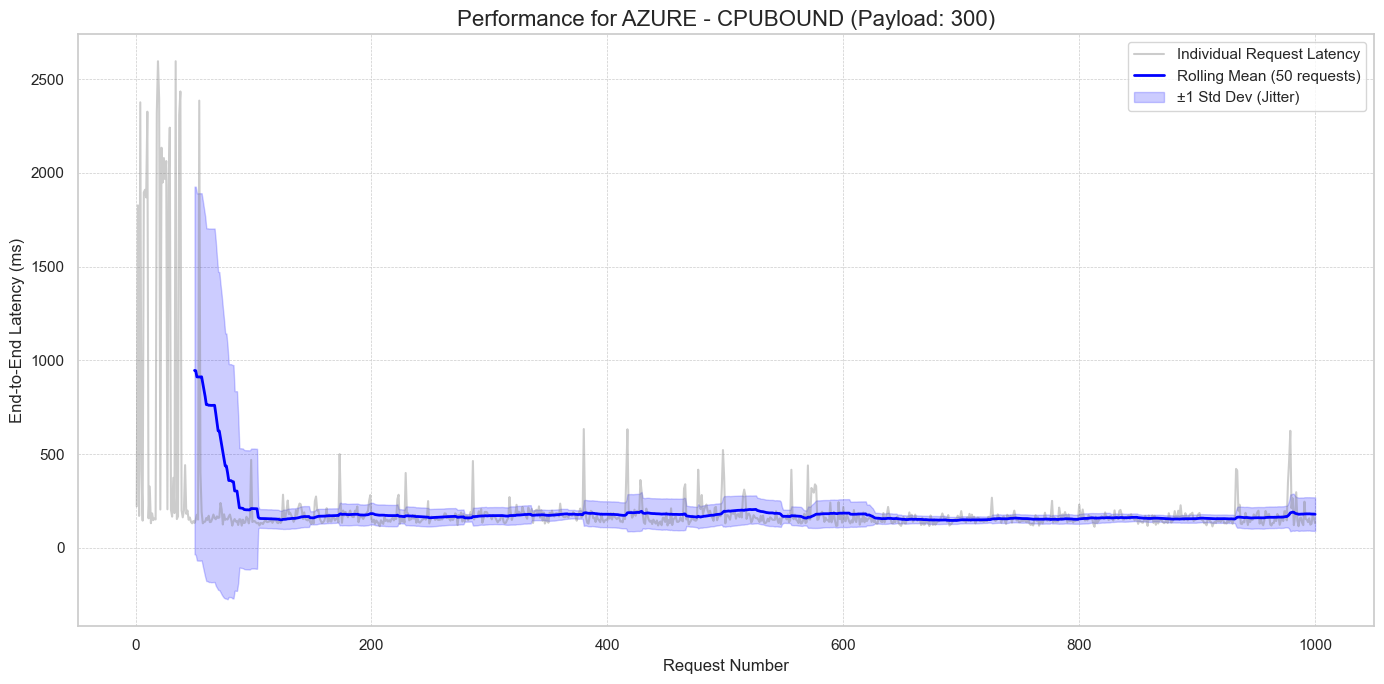

No data for AZURE - CPUBOUND - 1024
No data for AZURE - CPUBOUND - 256
No data for AZURE - IOBOUND - 1000
No data for AZURE - IOBOUND - 300


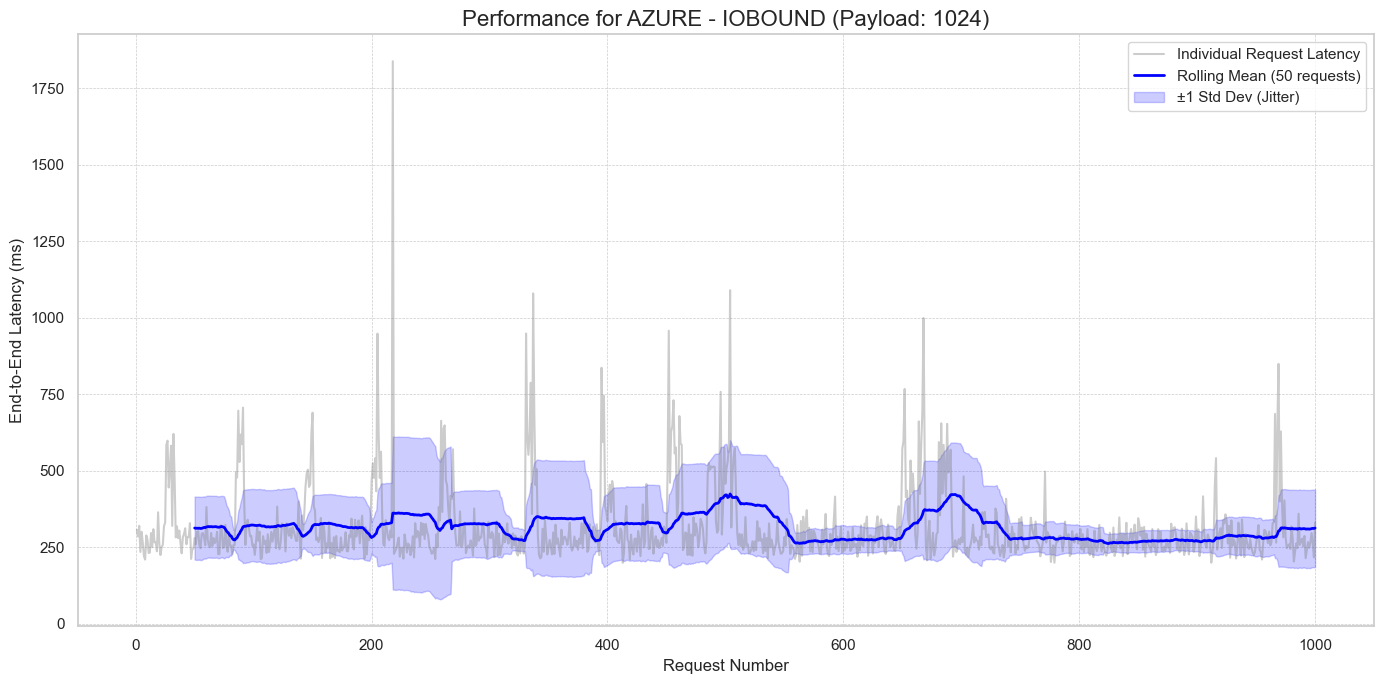

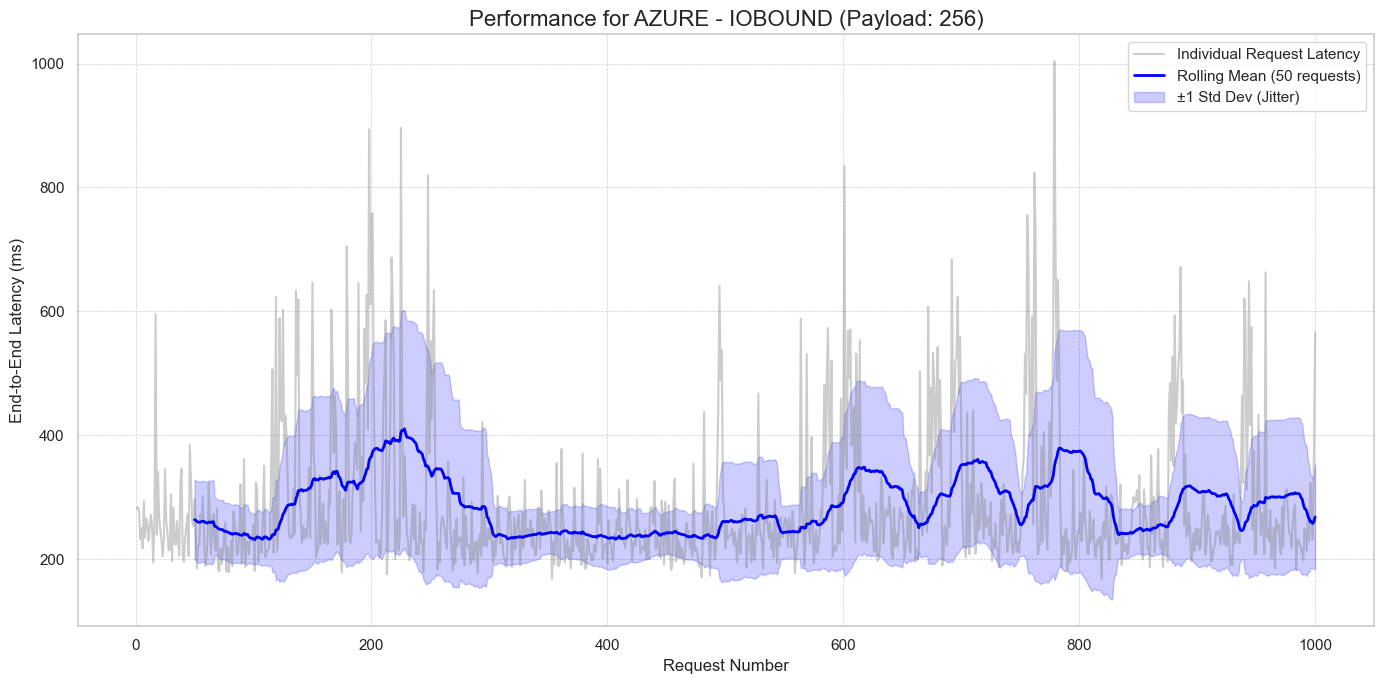

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure payload_size is treated as int (if not already)
master_df['payload_size'] = master_df['payload_size'].astype(int)

# Define all scenarios you want to plot
platforms = ['AWS', 'AZURE']
test_types = ['CPUBOUND', 'IOBOUND']
payloads = master_df['payload_size'].unique()

# Loop through all combinations
for platform in platforms:
    for test_type in test_types:
        for payload in payloads:
            subset = master_df[
                (master_df['platform'] == platform) &
                (master_df['test_type'] == test_type) &
                (master_df['payload_size'] == payload)
            ]
            
            if subset.empty:
                print(f"No data for {platform} - {test_type} - {payload}")
                continue

            # Rolling mean & std
            rolling_mean = subset['end_to_end_latency_ms'].rolling(window=50).mean()
            rolling_std = subset['end_to_end_latency_ms'].rolling(window=50).std()

            # Plot
            plt.figure(figsize=(14, 7))
            plt.plot(subset['request_id'], subset['end_to_end_latency_ms'], 
                     label='Individual Request Latency', color='grey', alpha=0.4)
            plt.plot(subset['request_id'], rolling_mean, 
                     label='Rolling Mean (50 requests)', color='blue', linewidth=2)
            plt.fill_between(subset['request_id'],
                             rolling_mean - rolling_std,
                             rolling_mean + rolling_std,
                             color='blue', alpha=0.2,
                             label='±1 Std Dev (Jitter)')

            # Titles & labels
            plt.title(f'Performance for {platform} - {test_type} (Payload: {payload})', fontsize=16)
            plt.xlabel('Request Number', fontsize=12)
            plt.ylabel('End-to-End Latency (ms)', fontsize=12)
            plt.legend()
            plt.grid(True, linestyle='--', linewidth=0.5)
            plt.tight_layout()
            plt.show()


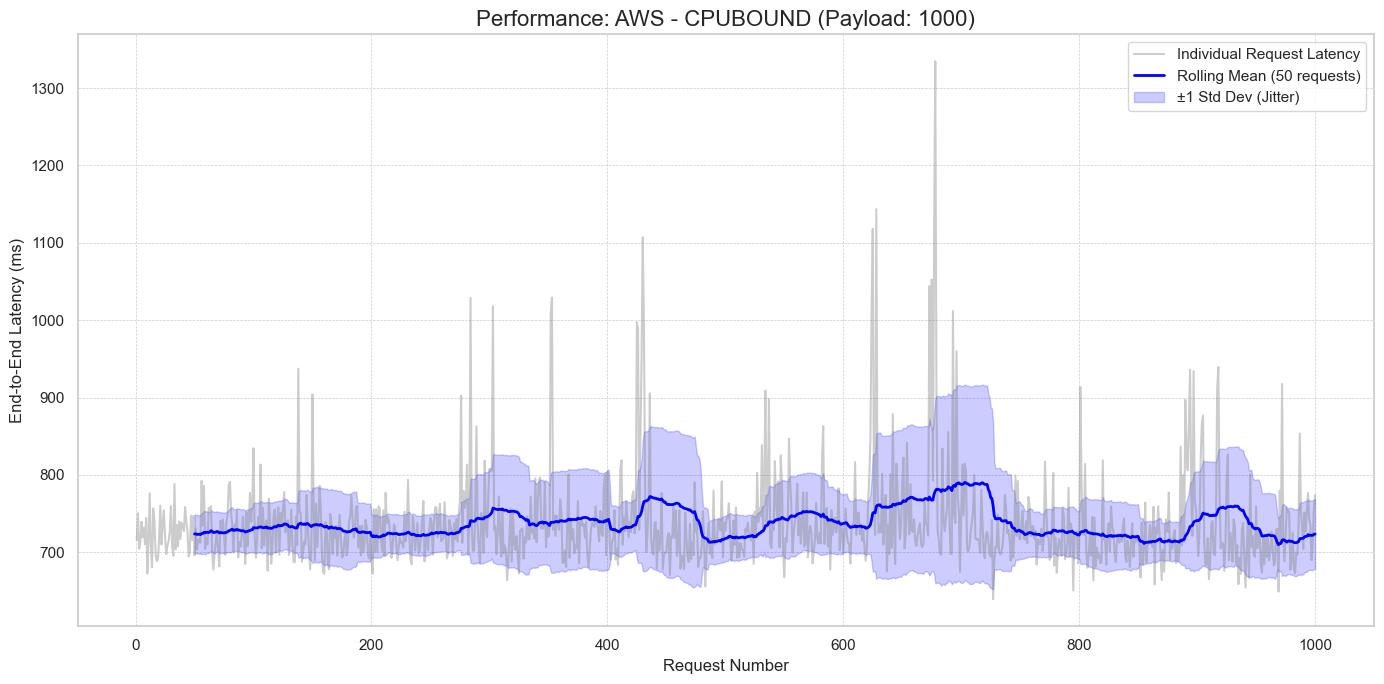

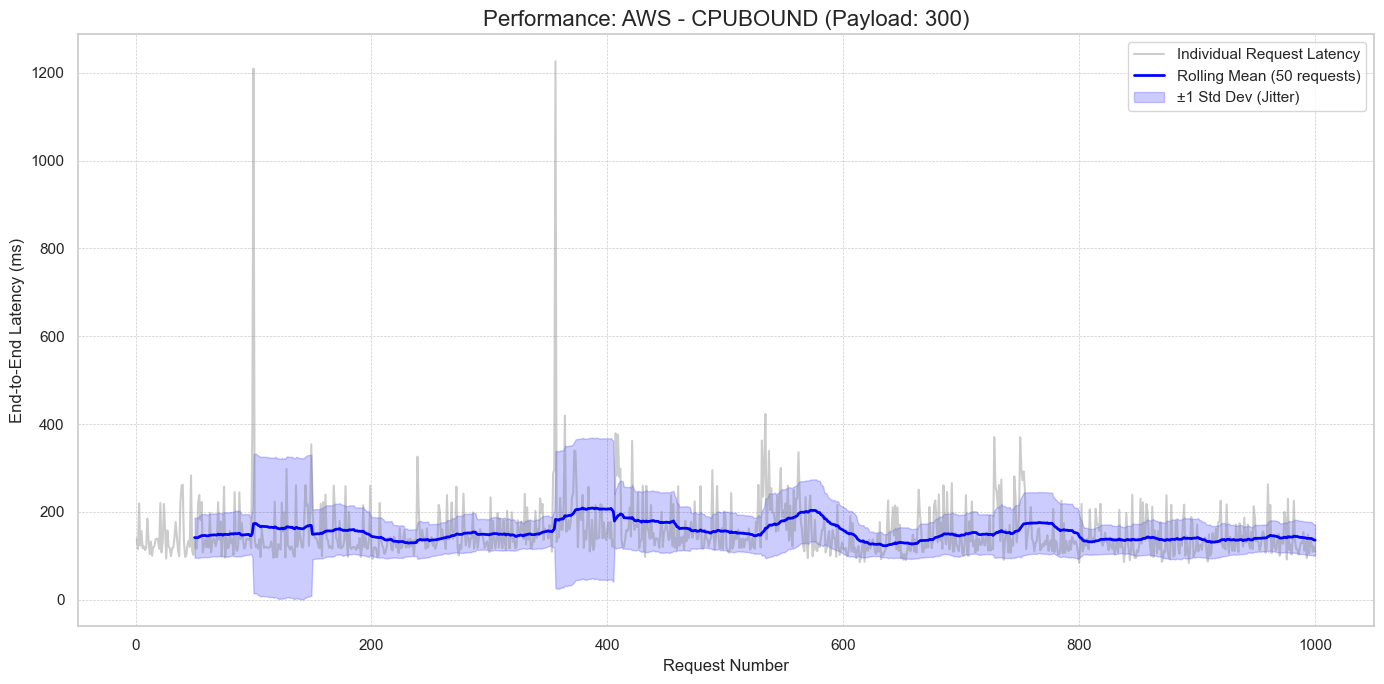

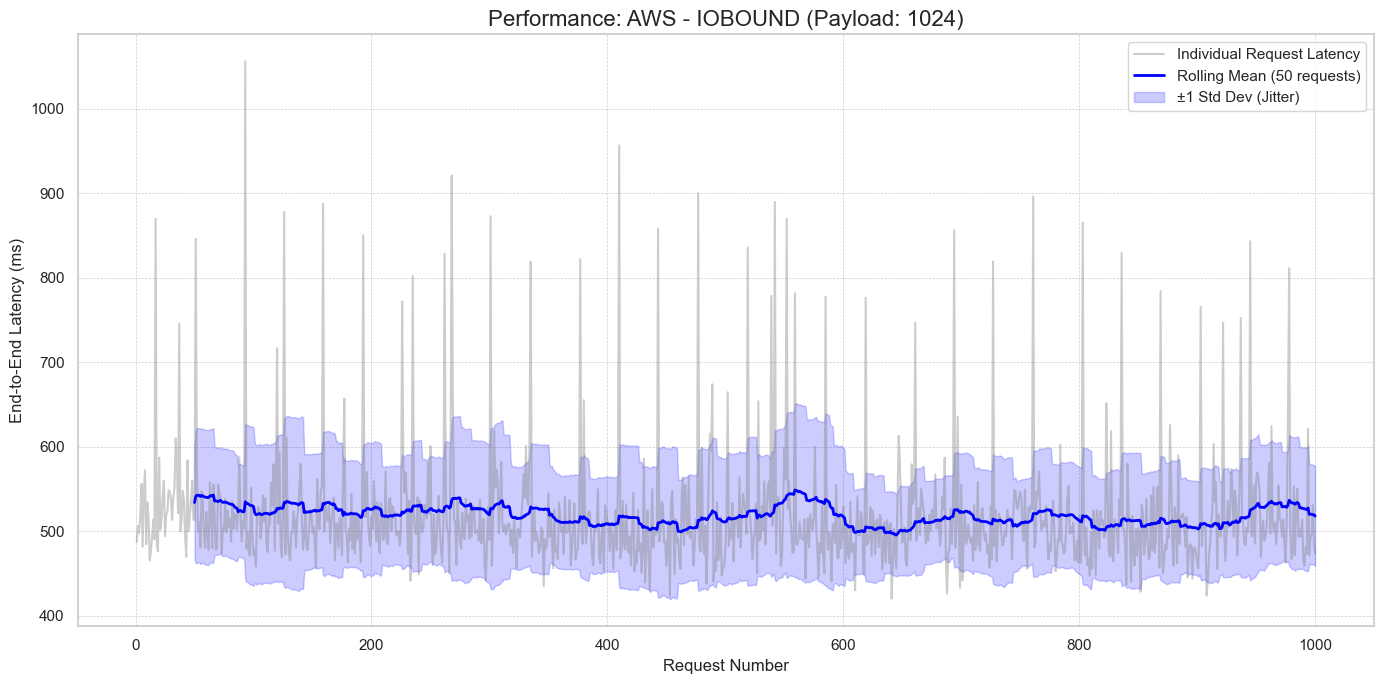

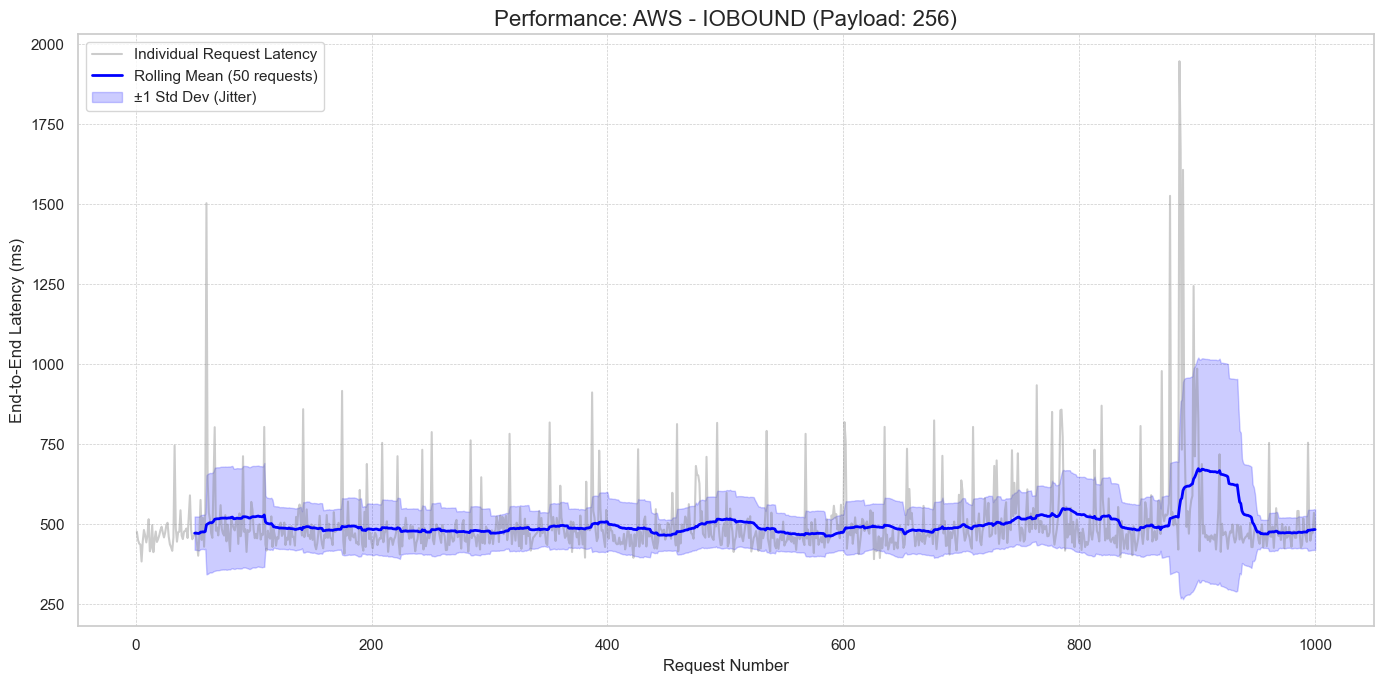

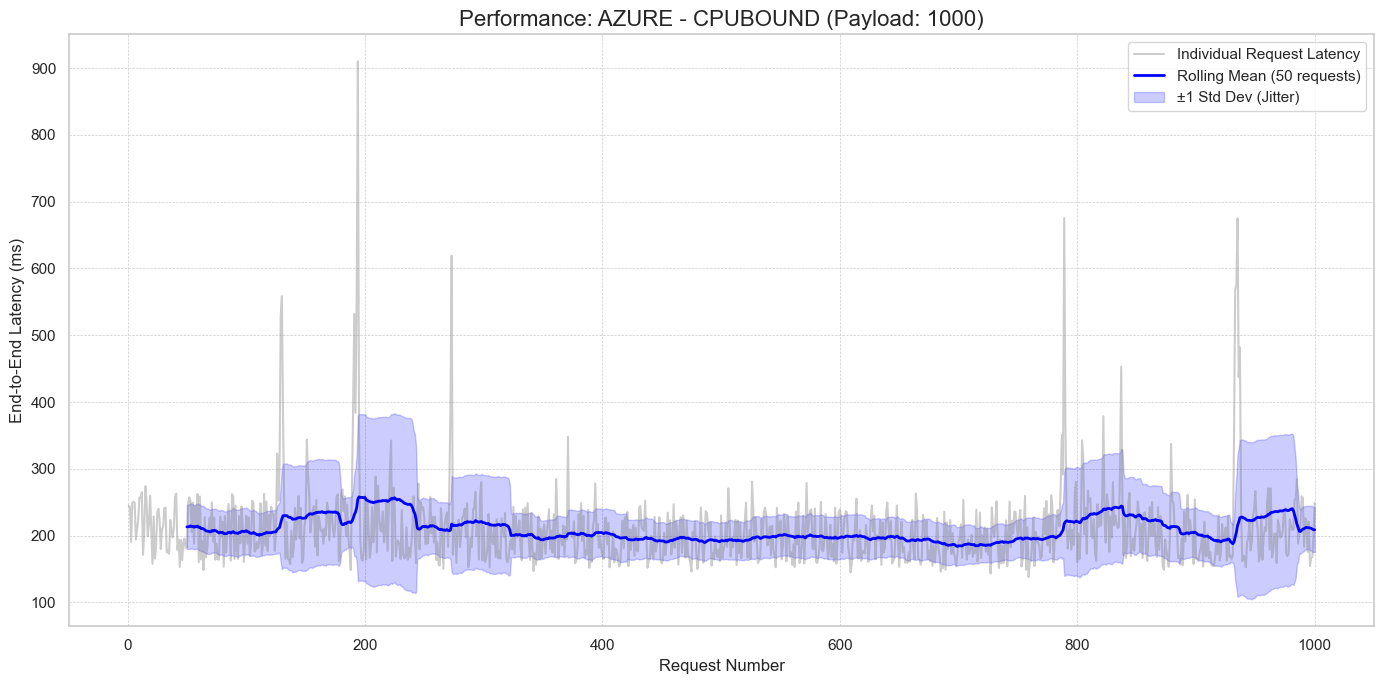

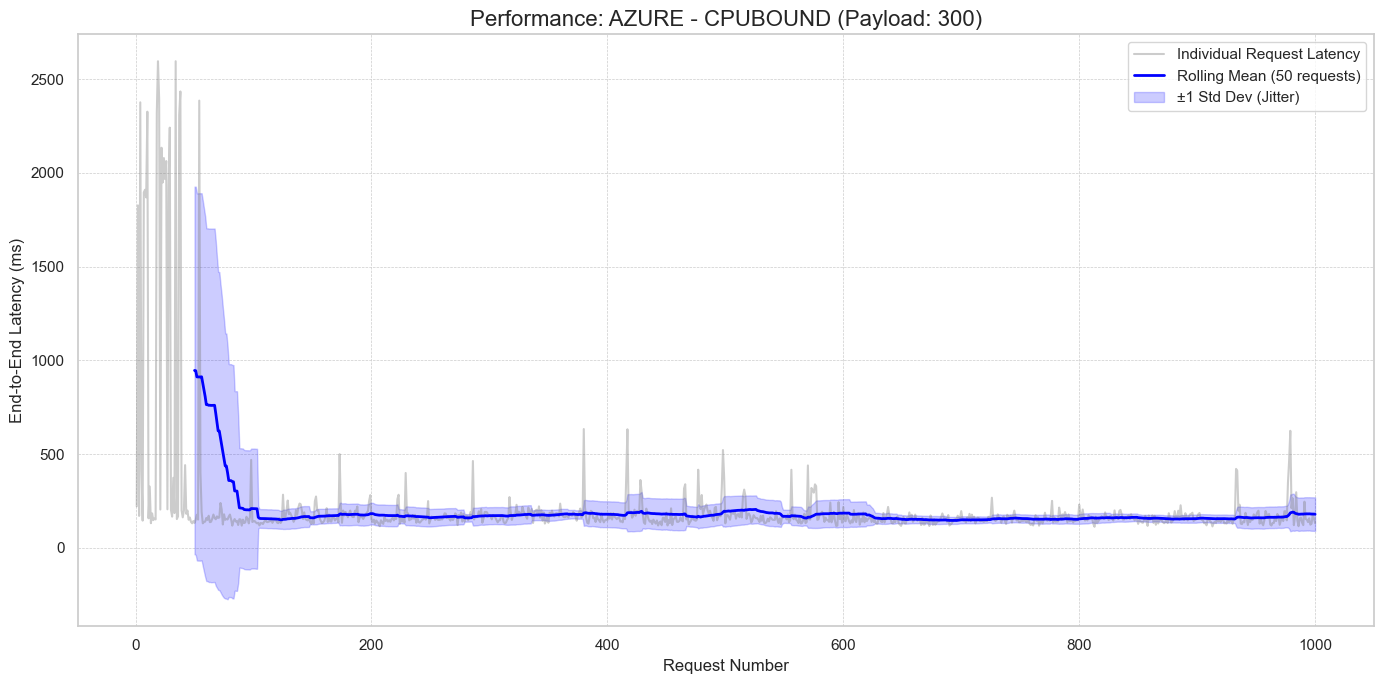

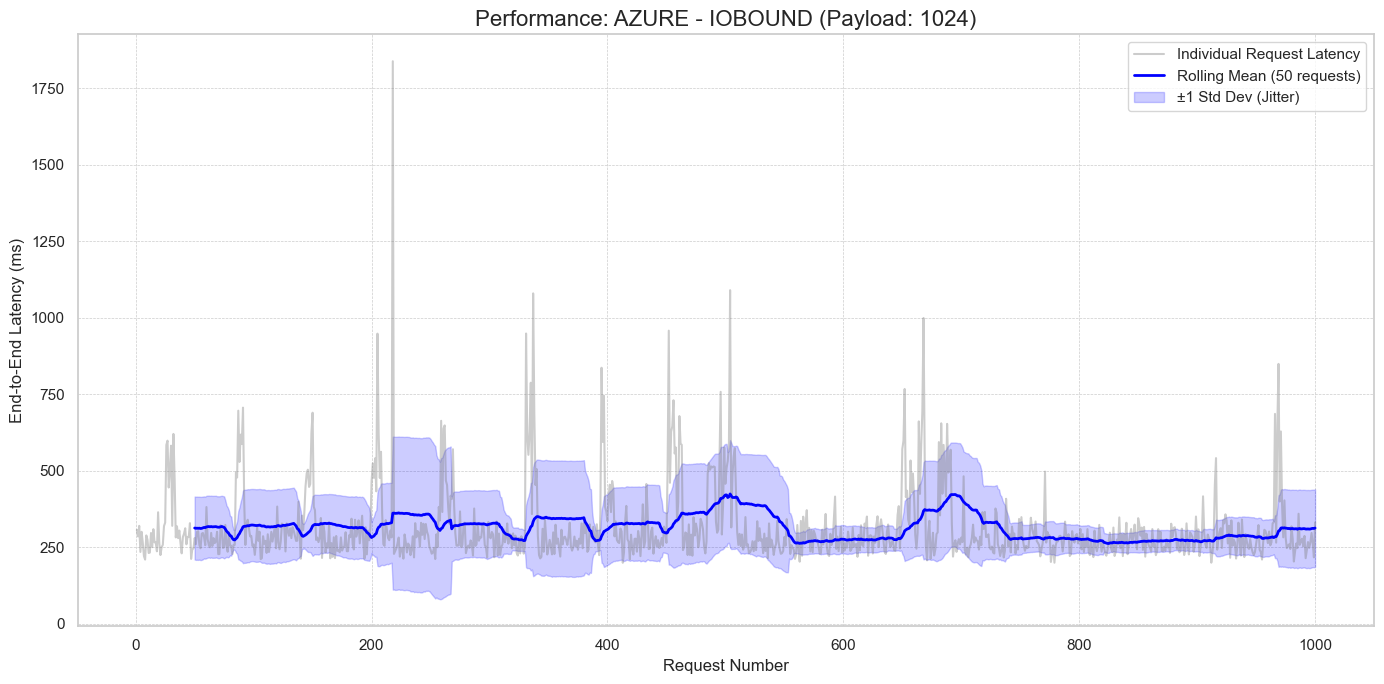

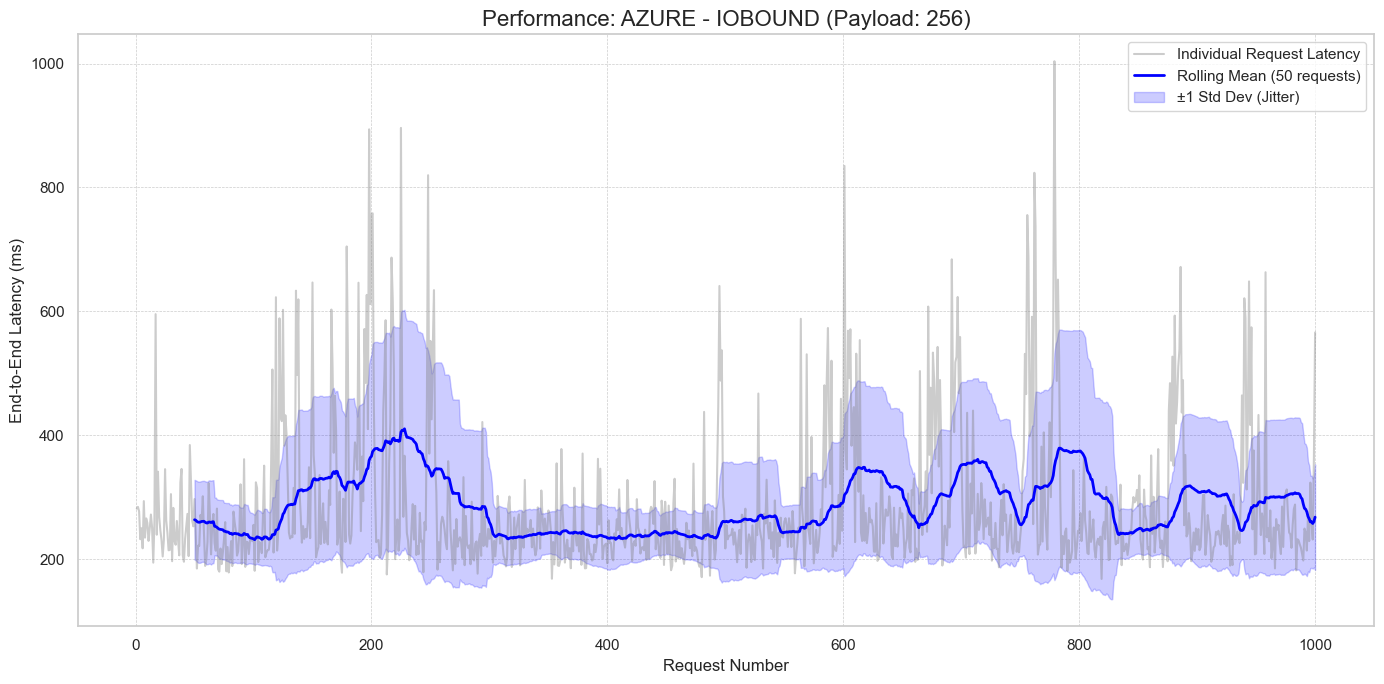

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct types
master_df['payload_size'] = master_df['payload_size'].astype(int)
master_df['platform'] = master_df['platform'].str.upper()
master_df['test_type'] = master_df['test_type'].str.upper()

# Get all unique valid combinations from data
valid_combinations = master_df[['platform', 'test_type', 'payload_size']].drop_duplicates()

# Loop through valid combinations only
for _, row in valid_combinations.iterrows():
    platform = row['platform']
    test_type = row['test_type']
    payload = row['payload_size']

    subset = master_df[
        (master_df['platform'] == platform) &
        (master_df['test_type'] == test_type) &
        (master_df['payload_size'] == payload)
    ]

    if subset.empty:
        continue

    # Rolling mean & std
    rolling_mean = subset['end_to_end_latency_ms'].rolling(window=50).mean()
    rolling_std = subset['end_to_end_latency_ms'].rolling(window=50).std()

    # Plot
    plt.figure(figsize=(14, 7))
    plt.plot(subset['request_id'], subset['end_to_end_latency_ms'], 
             label='Individual Request Latency', color='grey', alpha=0.4)
    plt.plot(subset['request_id'], rolling_mean, 
             label='Rolling Mean (50 requests)', color='blue', linewidth=2)
    plt.fill_between(subset['request_id'],
                     rolling_mean - rolling_std,
                     rolling_mean + rolling_std,
                     color='blue', alpha=0.2,
                     label='±1 Std Dev (Jitter)')

    plt.title(f'Performance: {platform} - {test_type} (Payload: {payload})', fontsize=16)
    plt.xlabel('Request Number', fontsize=12)
    plt.ylabel('End-to-End Latency (ms)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


<Figure size 1400x700 with 0 Axes>

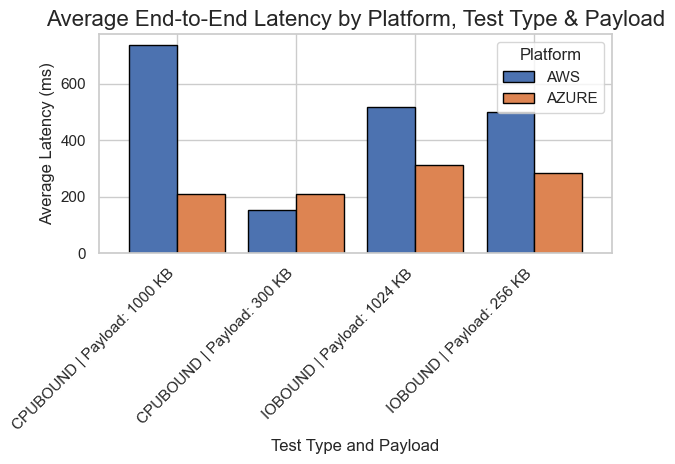

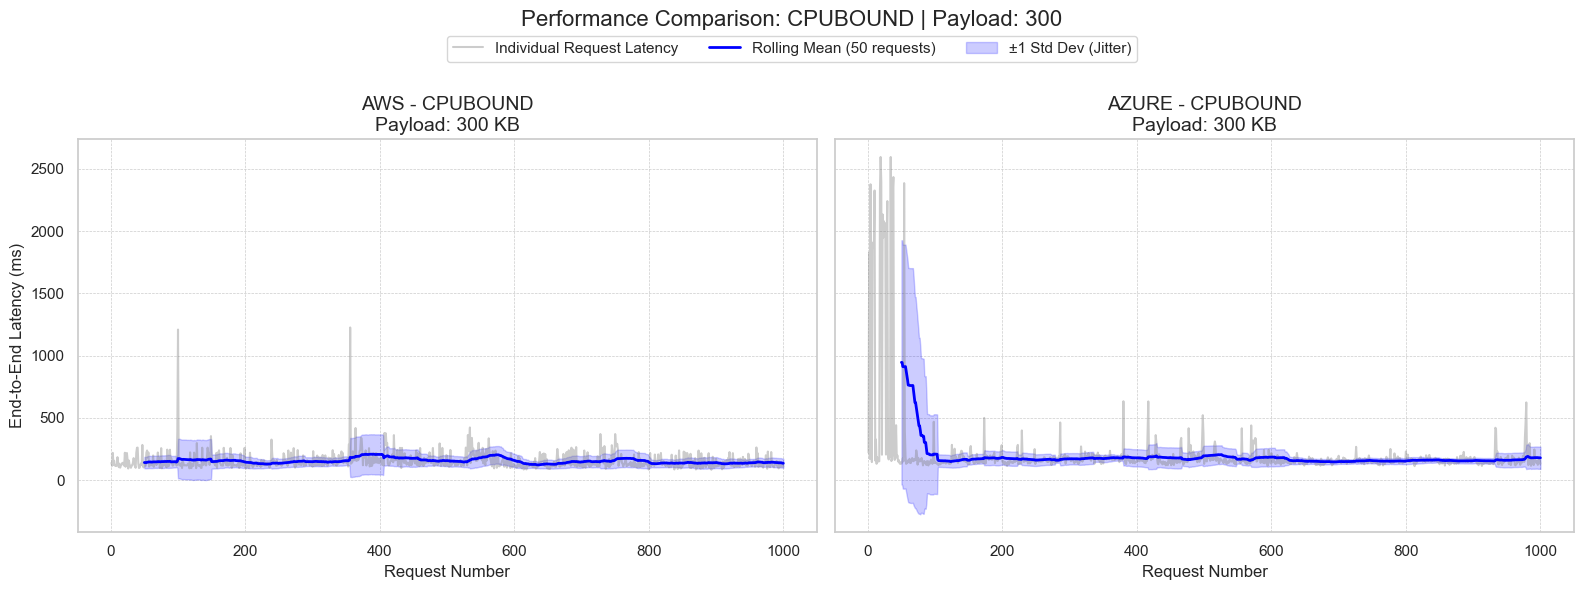

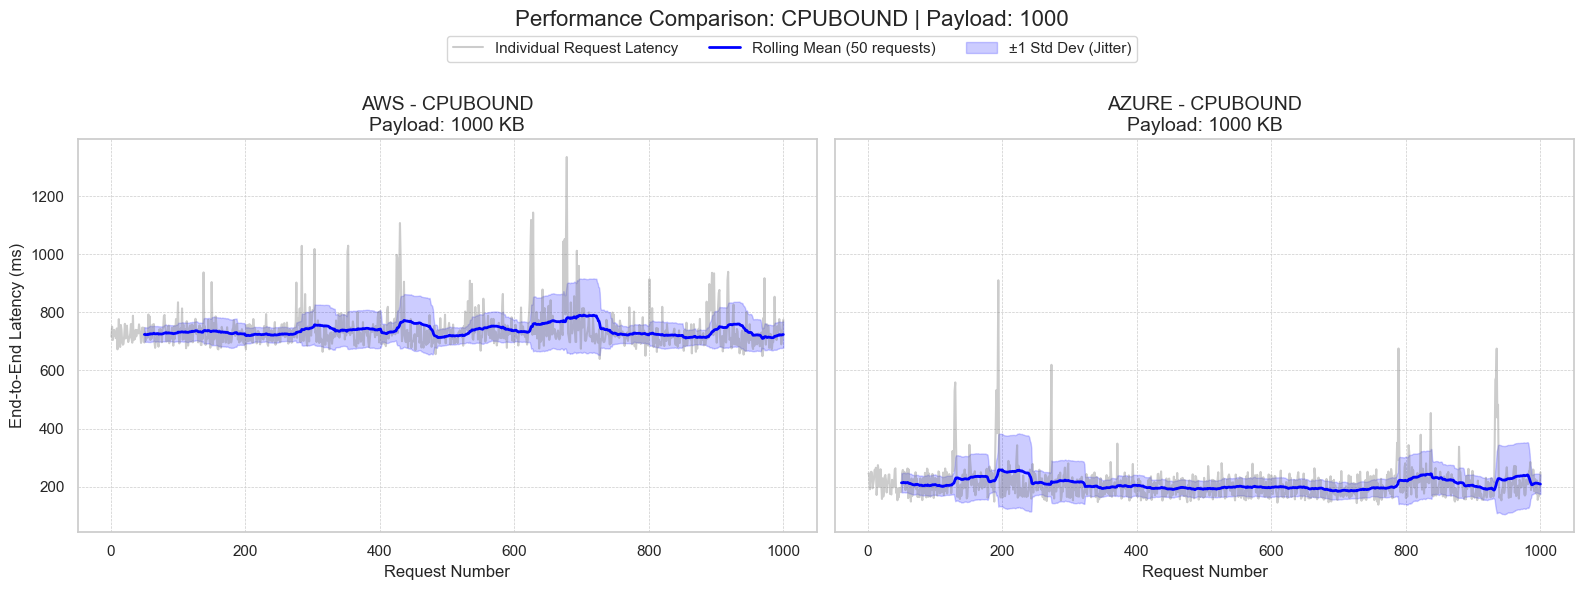

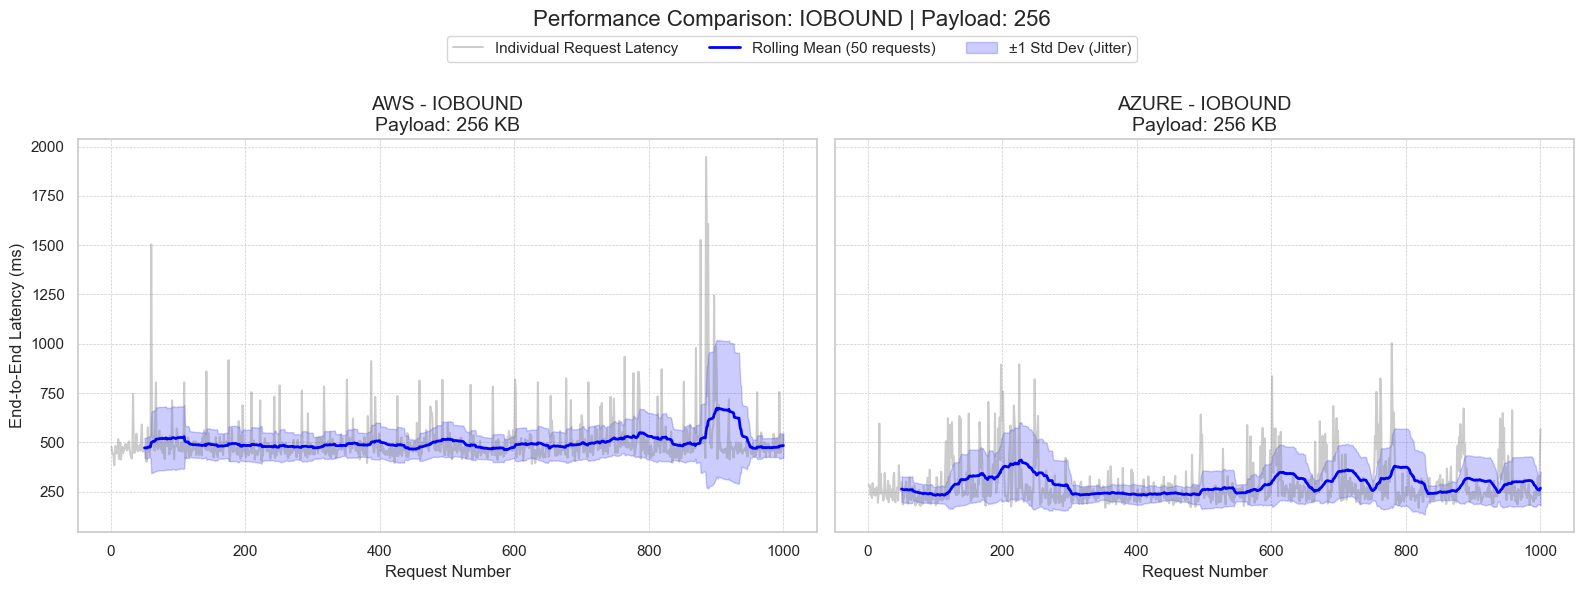

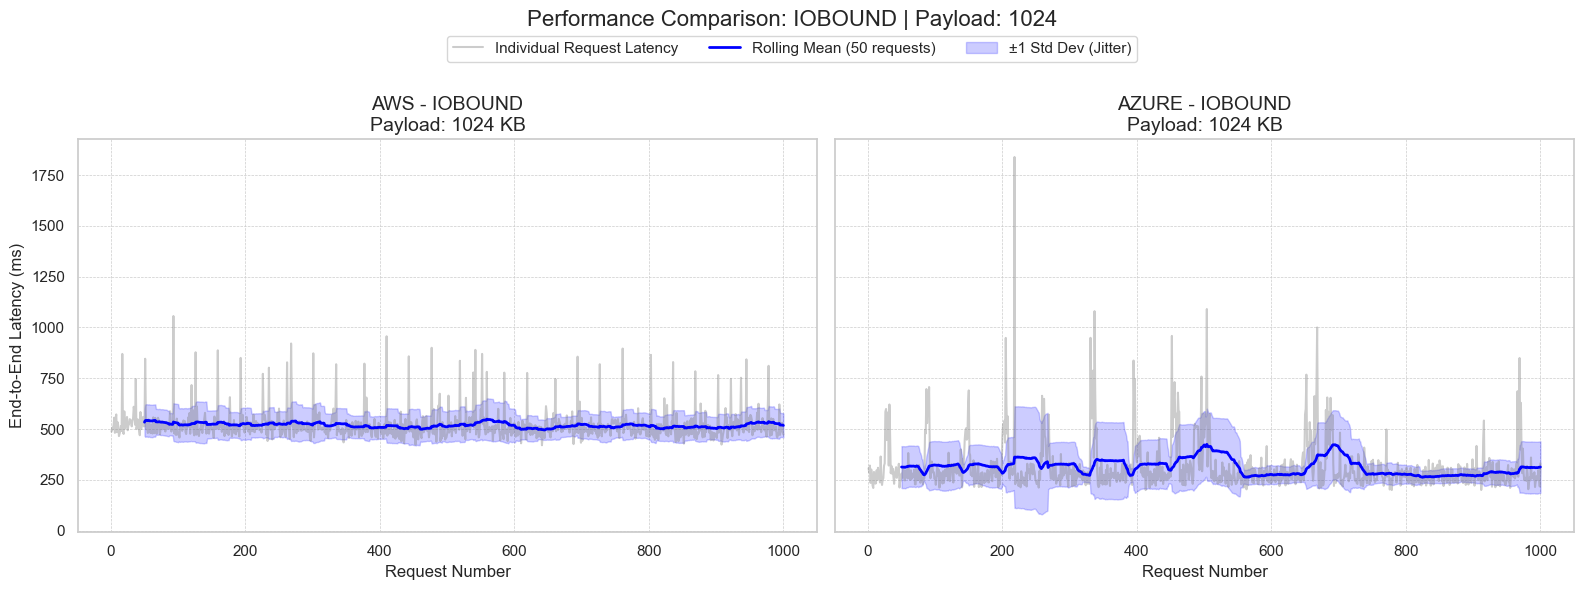

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent types and casing
master_df['payload_size'] = master_df['payload_size'].astype(int)
master_df['platform'] = master_df['platform'].str.upper()
master_df['test_type'] = master_df['test_type'].str.upper()

# Get unique sorted lists
test_types = sorted(master_df['test_type'].unique())
payloads = sorted(master_df['payload_size'].unique())
platforms = ['AWS', 'AZURE']

# Prepare summary DataFrame for bar chart
summary_rows = []
for test_type in test_types:
    for payload in payloads:
        for platform in platforms:
            subset = master_df[
                (master_df['platform'] == platform) &
                (master_df['test_type'] == test_type) &
                (master_df['payload_size'] == payload)
            ]
            if subset.empty:
                continue
            summary_rows.append({
                'test_type': test_type,
                'payload_size': payload,
                'platform': platform,
                'avg_latency': subset['end_to_end_latency_ms'].mean()
            })

summary_df = pd.DataFrame(summary_rows)

if summary_df.empty:
    print("No data available to plot.")
else:
    # Create a combined label for test type + payload
    summary_df['test_payload'] = summary_df['test_type'] + ' | Payload: ' + summary_df['payload_size'].astype(str) + ' KB'

    # Pivot to prepare for grouped bar chart
    plt.figure(figsize=(14, 7))
    plot_df = summary_df.pivot(index='test_payload', columns='platform', values='avg_latency')
    plot_df = plot_df.sort_index()

    # Use seaborn color palette 'deep'
    colors = sns.color_palette('deep', n_colors=len(platforms))

    plot_df.plot(kind='bar', width=0.8, edgecolor='black', color=colors)

    plt.title('Average End-to-End Latency by Platform, Test Type & Payload', fontsize=16)
    plt.ylabel('Average Latency (ms)')
    plt.xlabel('Test Type and Payload')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Platform')
    plt.tight_layout()
    plt.show()

    # Detailed rolling plots remain unchanged...
    for test_type in test_types:
        for payload in payloads:
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
            data_found = False

            for i, platform in enumerate(platforms):
                subset = master_df[
                    (master_df['platform'] == platform) &
                    (master_df['test_type'] == test_type) &
                    (master_df['payload_size'] == payload)
                ]
                if subset.empty:
                    axes[i].text(0.5, 0.5, f'No data for {platform}',
                                 ha='center', va='center', fontsize=12)
                    axes[i].set_title(f'{platform} - {test_type}\nPayload: {payload} KB', fontsize=14)
                    axes[i].axis('off')
                    continue

                data_found = True
                rolling_mean = subset['end_to_end_latency_ms'].rolling(window=50).mean()
                rolling_std = subset['end_to_end_latency_ms'].rolling(window=50).std()

                axes[i].plot(subset['request_id'], subset['end_to_end_latency_ms'],
                             label='Individual Request Latency', color='grey', alpha=0.4)
                axes[i].plot(subset['request_id'], rolling_mean,
                             label='Rolling Mean (50 requests)', color='blue', linewidth=2)
                axes[i].fill_between(subset['request_id'],
                                     rolling_mean - rolling_std,
                                     rolling_mean + rolling_std,
                                     color='blue', alpha=0.2,
                                     label='±1 Std Dev (Jitter)')

                axes[i].set_title(f'{platform} - {test_type}\nPayload: {payload} KB', fontsize=14)
                axes[i].set_xlabel('Request Number')
                axes[i].grid(True, linestyle='--', linewidth=0.5)
                if i == 0:
                    axes[i].set_ylabel('End-to-End Latency (ms)')

            if data_found:
                fig.suptitle(f'Performance Comparison: {test_type} | Payload: {payload}', fontsize=16)
                handles, labels = axes[0].get_legend_handles_labels()
                fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3)
                plt.tight_layout(rect=[0, 0, 1, 0.93])
                plt.show()
            else:
                plt.close()
